In [1]:
from candle.engine import Scalar, Vector
import candle.nn as nn
import candle.losses as losses
import candle.helpers as helpers

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Vector([Scalar(data=0.1, label=x0), Scalar(data=0.2, label=x1), Scalar(data=0.3, label=x2)])


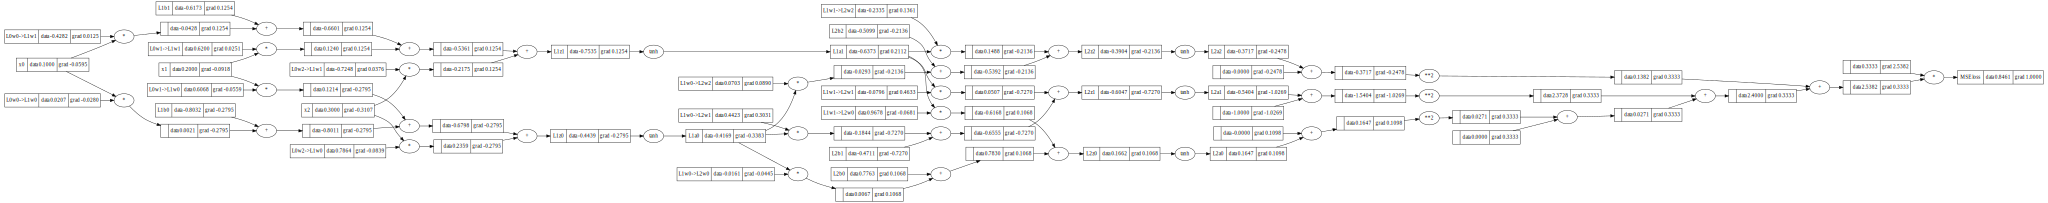

In [2]:
x0 = [0.1, 0.2, 0.3]
mlp = nn.MLP(3, [2, 3])
x = Vector(x0, label="x")
print(x)
y = [0.0, 1.0, 0.0]
y_preds = mlp(x)

loss = losses.mean_squared_error(y_preds, y)
loss.backward()
helpers.draw_dot(loss)


In [3]:
#print(mlp.layers[0].neurons[0].w[0].__repr__())
mlp.parameters()

[Scalar(data=0.020650745585947705, label=L0w0-\>L1w0),
 Scalar(data=0.6067512157925414, label=L0w1-\>L1w0),
 Scalar(data=0.7863552307373063, label=L0w2-\>L1w0),
 Scalar(data=-0.803213600116196, label=L1b0),
 Scalar(data=-0.4282267208897921, label=L0w0-\>L1w1),
 Scalar(data=0.6199938109783609, label=L0w1-\>L1w1),
 Scalar(data=-0.7248414701977706, label=L0w2-\>L1w1),
 Scalar(data=-0.6172605044755441, label=L1b1),
 Scalar(data=-0.016149602011334974, label=L1w0-\>L2w0),
 Scalar(data=0.9678447459818083, label=L1w1-\>L2w0),
 Scalar(data=0.7762743864549759, label=L2b0),
 Scalar(data=0.44228532599132064, label=L1w0-\>L2w1),
 Scalar(data=-0.07962619470155019, label=L1w1-\>L2w1),
 Scalar(data=-0.4710870921650159, label=L2b1),
 Scalar(data=0.0703198608788762, label=L1w0-\>L2w2),
 Scalar(data=-0.23349594429915888, label=L1w1-\>L2w2),
 Scalar(data=-0.5099241610534051, label=L2b2)]

In [4]:
for epoch in range(100):

    #forward pass
    y_pred = mlp(x)
    loss = losses.mean_squared_error(y_pred, y)

    # backward pass
    loss.backward()
    for p in mlp.parameters():
        p.data += -0.1 * p.grad

    print(epoch, loss.data)

0 0.44960377862527556
1 0.3808457460982966
2 0.2984366016292256
3 0.21174449145356736
4 0.12441726186501012
5 0.047621030055840875
6 0.007641912542765338
7 0.01861751074686151
8 0.05820554463175846
9 0.09846993230747277
10 0.12717264833128084
11 0.14083579234930702
12 0.13751806910443998
13 0.11537604686506861
14 0.07492661792311653
15 0.026530133486521505
16 0.000698130961589944
17 0.027561186975517626
18 0.0884535564494433
19 0.14405059363873957
20 0.17897678334614012
21 0.19577225835633483
22 0.2013210804173802
23 0.20003623498096884
24 0.19066720026356435
25 0.1667316462686903
26 0.1208061211676329
27 0.055894972779281196
28 0.007346402907387431
29 0.023120375710049115
30 0.08466882764047919
31 0.14605939149678993
32 0.18962259009911667
33 0.2131853072028726
34 0.2182716446173651
35 0.20772752352679882
36 0.18468362201389424
37 0.14986023765864023
38 0.10010011683019912
39 0.04112390284855634
40 0.014698968438638885
41 0.054073471326337025
42 0.11570122130350714
43 0.16201547552435

Vector([Scalar(data=0.1, label=x0), Scalar(data=0.9, label=x1)])
[Scalar(data=-0.7679255720208424, label=L1a0), Scalar(data=-0.5580449900111456, label=L1a1)]


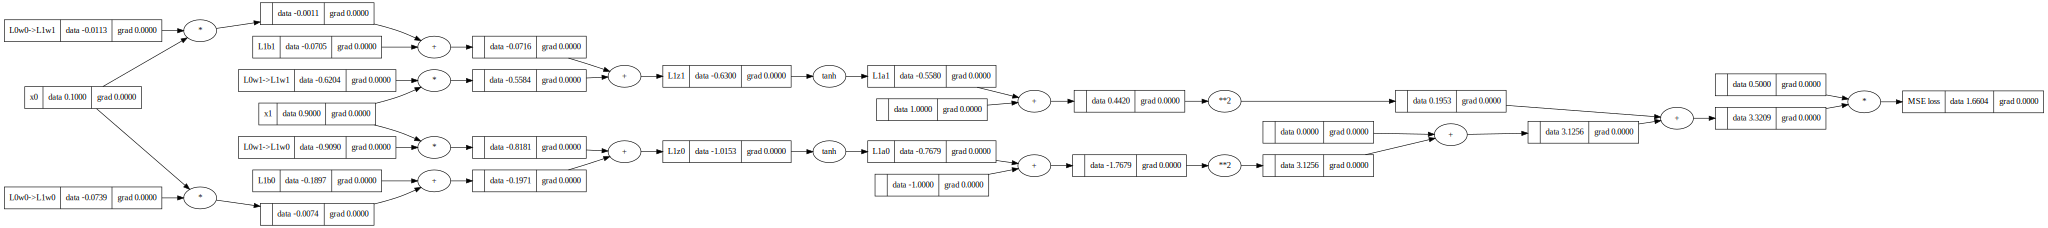

In [7]:
x = [0.1, 0.9]
x = Vector(x, label="x")
print(x)



mlp = nn.MLP(2, [2])

y = [1.0, -1.0]
y_preds = mlp(x)
print(y_preds)
#helpers.draw_dot(y_preds[0])
loss = losses.mean_squared_error(y_preds, y)
#loss.backward()
helpers.draw_dot(loss)

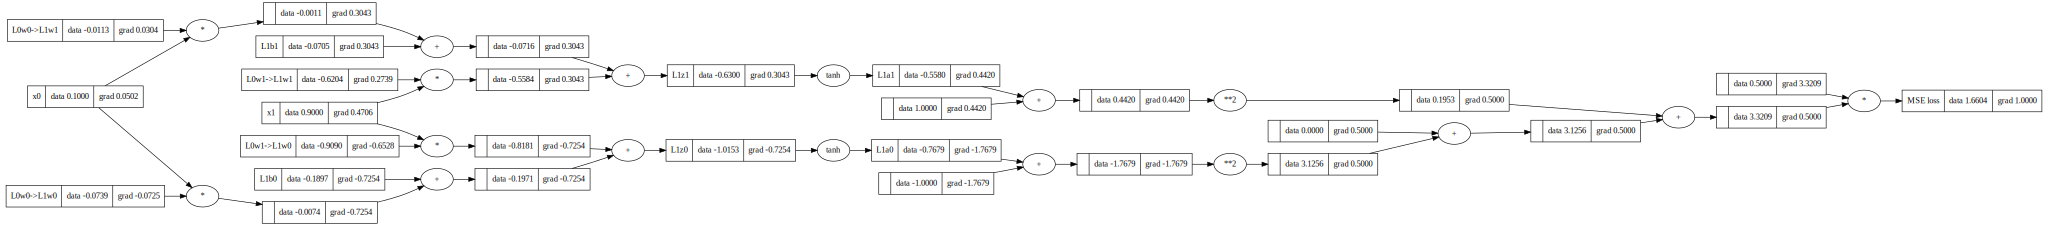

In [8]:
loss.backward()
helpers.draw_dot(loss)